In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
cities=pd.read_csv("/home/aa1/transit-lines-casestudy/data/transit_lines/cities.csv")
stations=pd.read_csv("/home/aa1/transit-lines-casestudy/data/transit_lines/lines.csv")
tracks=pd.read_csv("/home/aa1/transit-lines-casestudy/data/transit_lines/tracks.csv")
lines=pd.read_csv("/home/aa1/transit-lines-casestudy/data/transit_lines/lines.csv")
track_lines=pd.read_csv("/home/aa1/transit-lines-casestudy/data/transit_lines/track_lines.csv")
station_lines=pd.read_csv("/home/aa1/transit-lines-casestudy/data/transit_lines/station_lines.csv")
systems=pd.read_csv("/home/aa1/transit-lines-casestudy/data/transit_lines/systems.csv")


In [24]:
id_country=pd.DataFrame({'city_id':cities.id,'country':cities.country,'name':cities.name})

id_country





,city_id,country,name
0,5,Scotland,Aberdeen
1,6,Australia,Adelaide
2,7,Algeria,Algiers
3,9,Turkey,Ankara
4,16,Brazil,Belém
...,...,...,...
329,265,France,Nantes
330,110,Sweden,Stockholm
331,266,France,Rennes
332,15,China,Beijing


In [26]:
stations

,id,city_id,name,color,transport_mode_id
0,43,4,Línea 2,#ffbe2e,4.0
1,75,34,Línea 3 Metro de Caracas,#000,NaN
2,107,126,Línea 1,#434343,NaN
3,604,74,La navette,#009ab9,NaN
4,61,66,Línea 1 (Tramo 1A),#49aa43,NaN
...,...,...,...,...,...
1338,1466,124,Ramaditas,#4a90e2,7.0
1339,1467,124,Polanco,#4a90e2,7.0
1340,1468,124,Delicias,#4a90e2,7.0
1341,1469,124,Perdices,#4a90e2,7.0


In [27]:
tracks = tracks.drop(columns=['geometry','buildstart','opening', 'closure'])
tracks

,id,length,city_id
0,1911,6719,29
1,2563,199,118
2,2557,925,118
3,2558,881,118
4,2564,213,118
...,...,...,...
9266,9732,383,48
9267,9734,28,48
9268,9735,305,48
9269,9736,828,48


In [29]:
data1 = stations.merge(tracks, on= 'city_id')
data1

,id_x,city_id,name,color,transport_mode_id,id_y,length
0,43,4,Línea 2,#ffbe2e,4.0,175,1706
1,43,4,Línea 2,#ffbe2e,4.0,93,9447
2,43,4,Línea 2,#ffbe2e,4.0,85,2003
3,43,4,Línea 2,#ffbe2e,4.0,123,2697
4,43,4,Línea 2,#ffbe2e,4.0,128,4560
...,...,...,...,...,...,...,...
464212,1272,308,A,#ff2e17,5.0,8557,43
464213,1272,308,A,#ff2e17,5.0,8558,44
464214,1272,308,A,#ff2e17,5.0,8559,2830
464215,1272,308,A,#ff2e17,5.0,8560,2819


In [32]:
data = data1.merge(id_country, on= 'city_id')
data

,id_x,city_id,name_x,color,transport_mode_id,id_y,length,country,name_y
0,43,4,Línea 2,#ffbe2e,4.0,175,1706,Chile,Santiago
1,43,4,Línea 2,#ffbe2e,4.0,93,9447,Chile,Santiago
2,43,4,Línea 2,#ffbe2e,4.0,85,2003,Chile,Santiago
3,43,4,Línea 2,#ffbe2e,4.0,123,2697,Chile,Santiago
4,43,4,Línea 2,#ffbe2e,4.0,128,4560,Chile,Santiago
...,...,...,...,...,...,...,...,...,...
464212,1272,308,A,#ff2e17,5.0,8557,43,France,Orleans
464213,1272,308,A,#ff2e17,5.0,8558,44,France,Orleans
464214,1272,308,A,#ff2e17,5.0,8559,2830,France,Orleans
464215,1272,308,A,#ff2e17,5.0,8560,2819,France,Orleans


In [56]:
grouped = data.groupby(['name_y']).sum()
grouped

,id_x,city_id,transport_mode_id,id_y,length
name_y,,,,,
Angers,206064,59400,1080.0,1168884,101832
Barcelona,409654,15428,0.0,1639491,11972356
Beijing,261144,21060,0.0,929799,18521838
Berlin,5890,380,0.0,25800,12310
Besancon,268731,62826,1110.0,1673214,57648
...,...,...,...,...,...
Venice,3078,1392,0.0,12336,321144
Vienna,270480,138768,0.0,3108570,509820
Washington,118833,58212,264.0,294707,2176104


In [133]:
length = [grouped.loc['Tokyo'].length,grouped.loc['Osaka'].length,grouped.loc['New York'].length, grouped.loc['Paris'].length,grouped.loc['Buenos Aires'].length,grouped.loc['Mexico City'].length,grouped.loc['Santiago'].length, grouped.loc['Madrid'].length,grouped.loc['London'].length,grouped.loc['Nantes'].length]
length

[1267883441.0,
 286832000.0,
 94203760.0,
 45405150.0,
 41229468.0,
 9818732.0,
 16171454.0,
 4114123.0,
 68028695.0,
 6465498.0]

In [134]:
cities = np.array(['Tokyo', 'Osaka', 'New York', 'Paris', 'Buenos Aires', 'Mexico City', 'Santiago', 'Madrid', 'London', 'Nantes'])

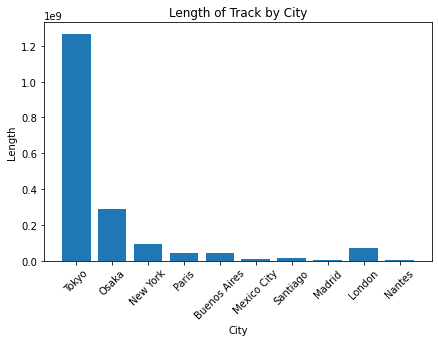

In [138]:
fig, ax = plt.subplots()
ax.bar(cities, length)
fig.tight_layout()
ax.tick_params(axis='x', labelrotation = 45)
ax.set_ylabel('Length')
ax.set_xlabel('City')
ax.set_title('Length of Track by City')
plt.savefig("/home/aa1/transit-lines-casestudy/png/length_by_city")